In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
corn = pd.read_csv("Corn-NY-All.csv")
corn.head()


,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2017,YEAR,NaN,COUNTY,NEW YORK,36,CENTRAL,50,CAYUGA,11.0,NaN,NaN,0,NaN,CORN,CORN - OPERATIONS WITH SALES,TOTAL,NOT SPECIFIED,260,24.2
1,CENSUS,2017,YEAR,NaN,COUNTY,NEW YORK,36,CENTRAL,50,CAYUGA,11.0,NaN,NaN,0,NaN,CORN,"CORN - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"23,218,000",11.7
2,CENSUS,2017,YEAR,NaN,COUNTY,NEW YORK,36,CENTRAL,50,CAYUGA,11.0,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"27,223",12.4
3,CENSUS,2017,YEAR,NaN,COUNTY,NEW YORK,36,CENTRAL,50,CAYUGA,11.0,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - OPERATIONS WITH AREA HARVESTED",AREA HARVESTED,"AREA HARVESTED: (1,000 OR MORE ACRES)",3,9.2
4,CENSUS,2017,YEAR,NaN,COUNTY,NEW YORK,36,CENTRAL,50,CAYUGA,11.0,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - OPERATIONS WITH AREA HARVESTED",AREA HARVESTED,AREA HARVESTED: (1.0 TO 24.9 ACRES),63,43.9


Data Cleaning

In [21]:
#drop period, geo level, state, state ansi, week ending, zip code, region, commodity???, watershed_code, watershed bc everything is year
corn.drop(columns =["Period", "Week Ending", "Geo Level","State", "State ANSI", "Zip Code","Region",  "watershed_code", "Watershed"], axis=1, inplace=True)
corn.head()

,Program,Year,Ag District,Ag District Code,County,County ANSI,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,CORN - OPERATIONS WITH SALES,TOTAL,NOT SPECIFIED,260,24.2
1,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,"CORN - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"23,218,000",11.7
2,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"27,223",12.4
3,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,"CORN, GRAIN - OPERATIONS WITH AREA HARVESTED",AREA HARVESTED,"AREA HARVESTED: (1,000 OR MORE ACRES)",3,9.2
4,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,"CORN, GRAIN - OPERATIONS WITH AREA HARVESTED",AREA HARVESTED,AREA HARVESTED: (1.0 TO 24.9 ACRES),63,43.9


In [22]:
corn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21706 entries, 0 to 21705
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Program           21706 non-null  object 
 1   Year              21706 non-null  int64  
 2   Ag District       21706 non-null  object 
 3   Ag District Code  21706 non-null  int64  
 4   County            21706 non-null  object 
 5   County ANSI       21081 non-null  float64
 6   Commodity         21706 non-null  object 
 7   Data Item         21706 non-null  object 
 8   Domain            21706 non-null  object 
 9   Domain Category   21706 non-null  object 
 10  Value             21706 non-null  object 
 11  CV (%)            2045 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.0+ MB


Things to Note:

1) There are D values, in both Value and CV % - Published data value or suppression reason code. There was no specific pattern oberved for the D value, for now we will drop them since it is 203 observations

2) there are many CV missing values, this is not a column of interest, we chose value to aid the analysis

3) Coefficient of variation. Available for the 2012 Census of Agriculture only. County-level CVs are generalized.

In [23]:
corn.nunique()

Program                2
Year                  48
Ag District            9
Ag District Code       9
County                58
County ANSI           57
Commodity              1
Data Item             22
Domain                 2
Domain Category        8
Value               5610
CV (%)                43
dtype: int64

In [24]:
#casting data types
corn = corn.drop(corn[corn.Value == " (D)"].index)

corn.replace(',','', regex=True, inplace=True)

corn['Value'] = corn['Value'].astype('float64')
corn['Program'] = corn['Program'].astype('category')
corn['Ag District'] = corn['Ag District'].astype('category')

corn['County'] = corn['County'].astype('category')
corn['Commodity'] = corn['Commodity'].astype('string')
corn['Data Item'] = corn['Data Item'].astype('category')
corn['Domain'] = corn['Domain'].astype('category')
corn['Domain Category'] = corn['Domain Category'].astype('category')

In [25]:
#check to see that everything casted properly into the correct data type
corn.isnull().sum()
corn.head()
corn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21463 entries, 0 to 21705
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Program           21463 non-null  category
 1   Year              21463 non-null  int64   
 2   Ag District       21463 non-null  category
 3   Ag District Code  21463 non-null  int64   
 4   County            21463 non-null  category
 5   County ANSI       20838 non-null  float64 
 6   Commodity         21463 non-null  string  
 7   Data Item         21463 non-null  category
 8   Domain            21463 non-null  category
 9   Domain Category   21463 non-null  category
 10  Value             21463 non-null  float64 
 11  CV (%)            1946 non-null   object  
dtypes: category(6), float64(2), int64(2), object(1), string(1)
memory usage: 1.3+ MB


Agricultural District vs. Corn output


*   Western, Centrak, Northern and Southwest districts seem to have produced the most corn over the years





Text(0, 0.5, 'Corn Output')

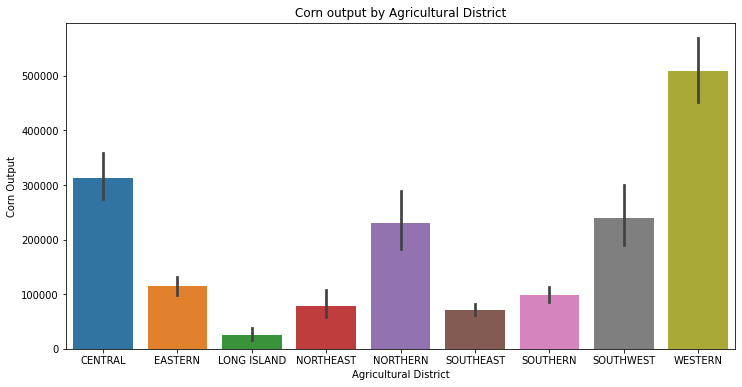

In [26]:

plt.figure(figsize=(12,6))
plt.title("Corn output by Agricultural District")

sns.barplot(x="Ag District", y="Value", data=corn)

plt.xlabel('Agricultural District')
plt.ylabel('Corn Output')

,Year,Ag District Code,County ANSI,Value
Domain,,,,
AREA HARVESTED,4167363,114462,123028.0,3.841600e+04
TOTAL,38686129,1107405,1140344.0,5.185931e+09


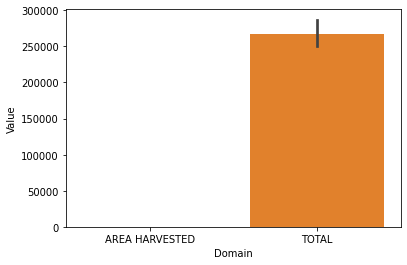

In [27]:
#shall I delete??? I am not sure what business value this brings.
sns.barplot(x="Domain", y="Value", data=corn)
corn.groupby("Domain").sum()

domain category vs. value
*   As we increase the area the value of corn goes down




In [28]:

dc = corn.groupby("Domain Category")[["Value"]].sum().reset_index()
dc


,Domain Category,Value
0,AREA HARVESTED: (1.0 TO 24.9 ACRES),1.252600e+04
1,AREA HARVESTED: (100 TO 249 ACRES),5.973000e+03
2,AREA HARVESTED: (1000 OR MORE ACRES),5.560000e+02
3,AREA HARVESTED: (25.0 TO 99.9 ACRES),1.555300e+04
4,AREA HARVESTED: (250 TO 499 ACRES),2.286000e+03
5,AREA HARVESTED: (500 OR MORE ACRES),3.270000e+02
6,AREA HARVESTED: (500 TO 999 ACRES),1.195000e+03
7,NOT SPECIFIED,5.185931e+09




1.   Only CORN - ACRES PLANTED or CORN TRADITIONAL OR INDIAN IRRIGATED - OPERATIONS WITH AREA HARVESTED available, other options are nulls. 




In [29]:
di = corn.groupby(["Data Item", "Year"])[["Value"]].sum().reset_index()
di.isnull().sum()


Data Item      0
Year           0
Value        619
dtype: int64

In [30]:
di[di["Data Item"]=="CORN - SALES, MEASURED IN $"]

,Data Item,Year,Value


In [31]:
di_df = di[di["Data Item"]=="CORN - ACRES PLANTED"]
di_df.shape
di_df.head()

,Data Item,Year,Value
0,CORN - ACRES PLANTED,1972,985000.0
1,CORN - ACRES PLANTED,1973,1070000.0
2,CORN - ACRES PLANTED,1974,1200000.0
3,CORN - ACRES PLANTED,1975,1230000.0
4,CORN - ACRES PLANTED,1976,1260000.0


the amount of corn being planted is actually decreasing over time


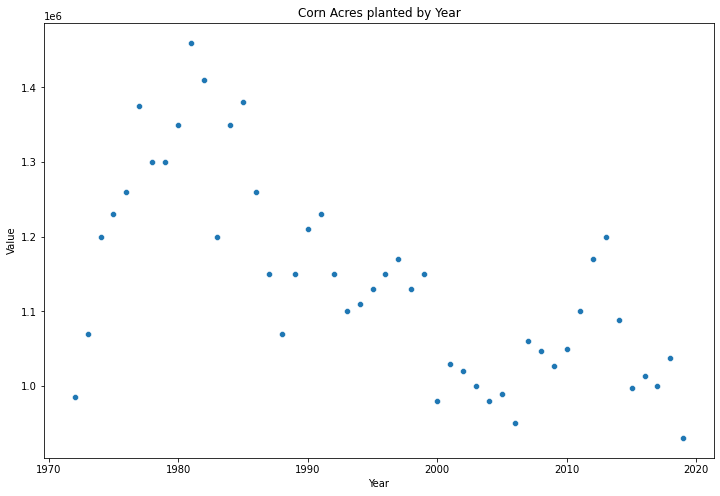

In [32]:
plt.figure(figsize=(12,8))
plt.title("Corn Acres planted by Year")
sns.scatterplot(x="Year", y="Value", data=di_df)

In [33]:
corn.groupby(["Data Item", "Year"])["Value"].sum()

Data Item                                                              Year
CORN - ACRES PLANTED                                                   1972     985000.0
                                                                       1973    1070000.0
                                                                       1974    1200000.0
                                                                       1975    1230000.0
                                                                       1976    1260000.0
                                                                                 ...    
CORN TRADITIONAL OR INDIAN IRRIGATED - OPERATIONS WITH AREA HARVESTED  2015          NaN
                                                                       2016          NaN
                                                                       2017          3.0
                                                                       2018          NaN
                                  

Some county stats

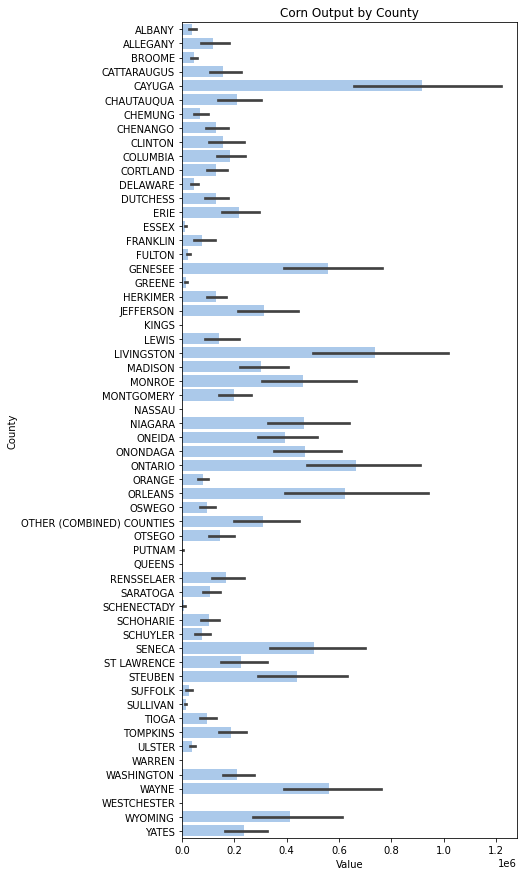

In [34]:
plt.subplots(figsize=(6, 15))
plt.title("Corn Output by County")
corn.sort_values("Value", ascending=True)
sns.set_color_codes("pastel")
sns.barplot(x="Value", y="County", data=corn,
            label="Corn Output", color="b")


Top 10 counties by corn production

In [35]:
top_counties = corn.groupby("County").sum()
top_counties.Value.sort_values(ascending=False)[:10]


County
CAYUGA                       400401948.5
LIVINGSTON                   318007100.2
ONTARIO                      288148702.7
GENESEE                      241612004.5
WAYNE                        240935849.1
ORLEANS                      237818234.6
ONONDAGA                     205082445.5
SENECA                       202231153.1
NIAGARA                      200239735.3
OTHER (COMBINED) COUNTIES    193807246.0
Name: Value, dtype: float64

Of the top five counties which have the highest corn production, here are their corresponding percentages. 




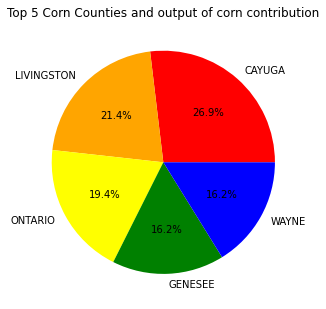

In [36]:
plt.figure(figsize=(5,6))
plt.title("Top 5 Corn Counties and output of corn contribution")
labels = "CAYUGA", "LIVINGSTON", "ONTARIO", "GENESEE", "WAYNE"
values = [400401948.5, 318007100.2, 288148702.7, 241612004.5, 240935849.1]
colors = "red", "orange", "yellow", "green", "blue", "purple"
plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%");

How corn output has changed over the years, stagnant from 70s-2000s, however peaked in recent years.

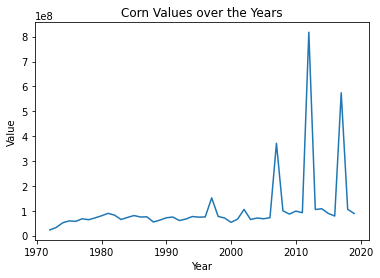

In [37]:
cy = corn.groupby("Year")[["Value"]].sum()
#Corn Values over the years
plt.title("Corn Values over the Years")
sns.lineplot(x="Year", y="Value", data = cy)

Now recent years

In [45]:

recent = corn[corn["Year"]>=2015]
recent

,Program,Year,Ag District,Ag District Code,County,County ANSI,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,CORN - OPERATIONS WITH SALES,TOTAL,NOT SPECIFIED,260.0,24.2
1,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,CORN - SALES MEASURED IN $,TOTAL,NOT SPECIFIED,23218000.0,11.7
2,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,CORN GRAIN - ACRES HARVESTED,TOTAL,NOT SPECIFIED,27223.0,12.4
3,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,CORN GRAIN - OPERATIONS WITH AREA HARVESTED,AREA HARVESTED,AREA HARVESTED: (1000 OR MORE ACRES),3.0,9.2
4,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,CORN GRAIN - OPERATIONS WITH AREA HARVESTED,AREA HARVESTED,AREA HARVESTED: (1.0 TO 24.9 ACRES),63.0,43.9
...,...,...,...,...,...,...,...,...,...,...,...,...
5762,SURVEY,2015,WESTERN,40,YATES,123.0,CORN,CORN GRAIN - PRODUCTION MEASURED IN BU,TOTAL,NOT SPECIFIED,1625000.0,NaN
5763,SURVEY,2015,WESTERN,40,YATES,123.0,CORN,CORN GRAIN - YIELD MEASURED IN BU / ACRE,TOTAL,NOT SPECIFIED,156.3,NaN
5764,SURVEY,2015,WESTERN,40,YATES,123.0,CORN,CORN SILAGE - ACRES HARVESTED,TOTAL,NOT SPECIFIED,5500.0,NaN
5765,SURVEY,2015,WESTERN,40,YATES,123.0,CORN,CORN SILAGE - PRODUCTION MEASURED IN TONS,TOTAL,NOT SPECIFIED,90000.0,NaN


Consistent with what was found from above

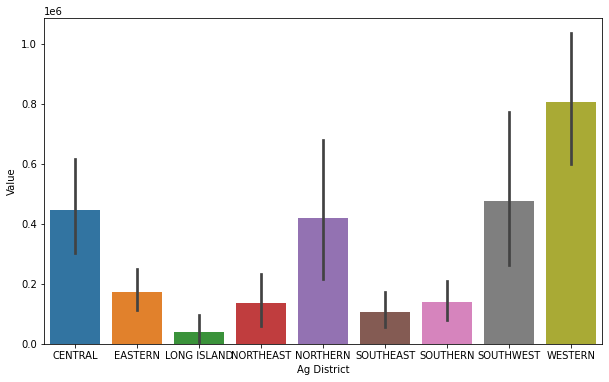

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x="Ag District", y="Value", data=recent)